## Commençons par faire afficher notre image
Nous voulons afficher cette célèbre image
<p style="text-align:left";>
<img src="https://www.nsi-ljm.fr/photo/joconde.png" width="204px" height="160px">
</p>
Pour utiliser/manipuler des images en Python, il faut utiliser une bibliothèque.

Nous utiliserons la bibliothèque: **open-cv**

Si elle n'est pas déjà installée :  

In [1]:
#pip install opencv-python

## Travail demandé (1)
Commenter le fonctionnement de chaque cellule 

Importer les bibliotheques 

In [38]:
import cv2
import matplotlib.pyplot as plt
import matplotlib

import skimage.io
import skimage.transform
import skimage as ski
from skimage import io, color, util, segmentation
import numpy as np
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase


Importer l'image

In [39]:
img = cv2.imread('Mona.png')

Afficher l'image. Pourquoi elle est en bleue Car opencv vas importe limage en BlUE GREEN RED
Faire attention avec open Cv 
Bibli developé par le C++

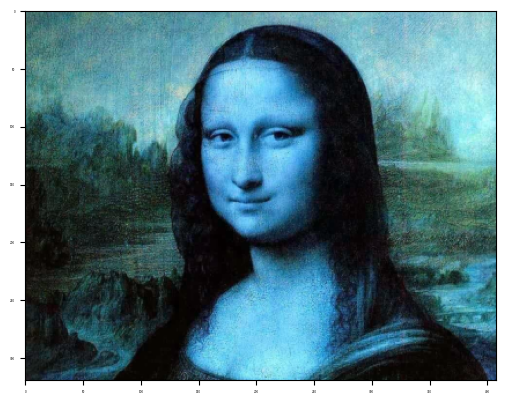

In [40]:
plt.imshow(img)

Enlevez les extensions de couleur Ontransforme les couleurs de BGR A RGB. Il y a des inversions de donnée entre c++ et python

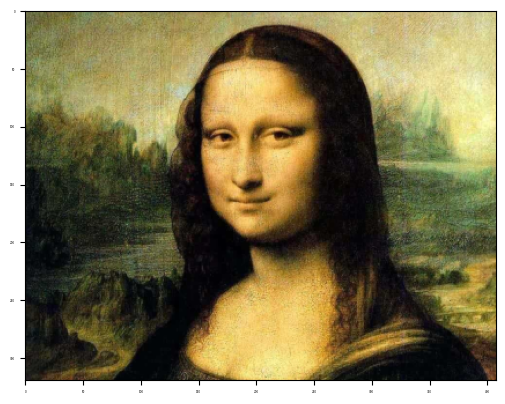

In [41]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

Gerer la taille

In [42]:
im_rgb.shape

(320, 408, 3)

Affiche en gris

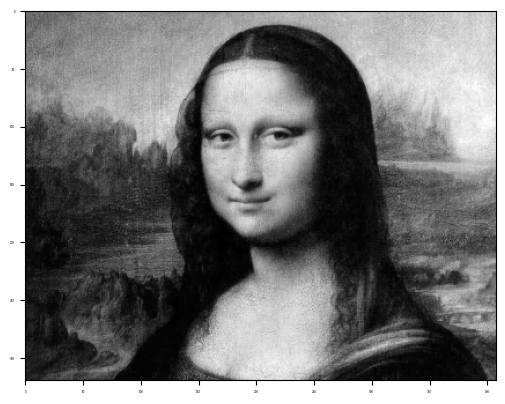

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Appliquer un effet grisatre 

In [44]:
gray.shape

(320, 408)

Afficher l'image pixelisé

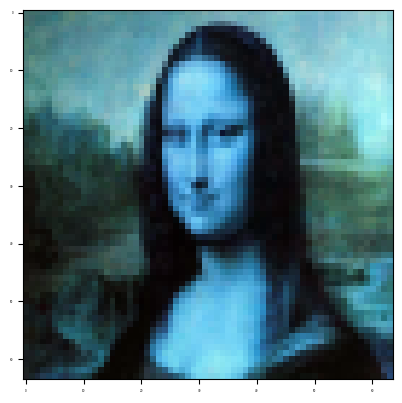

In [45]:
resized = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
plt.imshow(resized)

Prendre l'image en format 50 ; 200 ,150 250

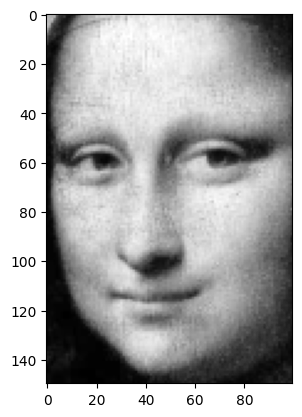

In [9]:
patch = gray[50:200,150:250]
plt.imshow(patch, cmap='gray')

Faire un effet d'image et la zoomer

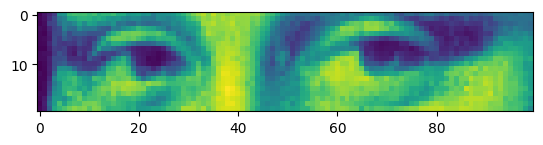

In [10]:
patch = patch[50:70,:]
plt.imshow(patch)

## Travail demandé (2)
Refaire les mêmes instructions sur l'image : 'KN.jpg'

<img src="C:\Users\Utilisateur\Downloads\KN2.jpg" width="204px" height="160px">

In [45]:

imga = cv2.imread('C:/Users/Utilisateur/Downloads/KN2.jpg')

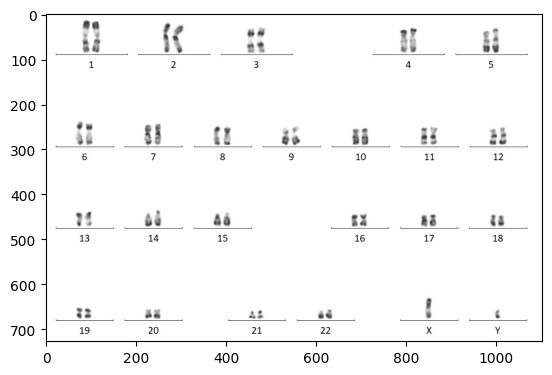

In [47]:
imga_rgb = cv2.cvtColor(imga, cv2.COLOR_BGR2RGB)

plt.imshow(imga_rgb)

plt.show()



Proposer l'image en gris saturé

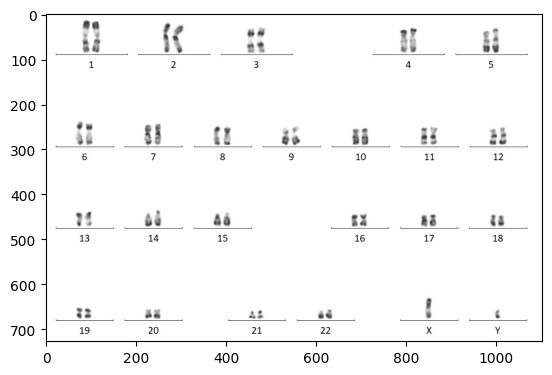

In [48]:
plt.imshow(imga, cmap='gray')  
plt.show()

Afficherl'image en pixel

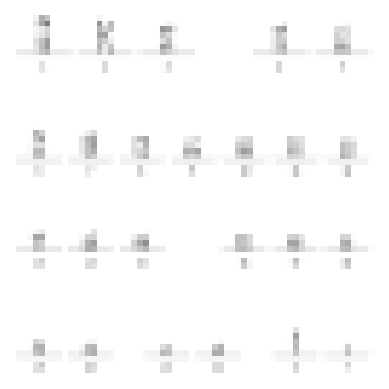

In [51]:
resized = cv2.resize(imga, (64, 64), interpolation=cv2.INTER_AREA)

# Afficher l'image redimensionnée en niveaux de gris
plt.imshow(resized, cmap='gray')
plt.axis('off')  # Masquer les axes
plt.show()


Faire un zoom coté sur l'image 

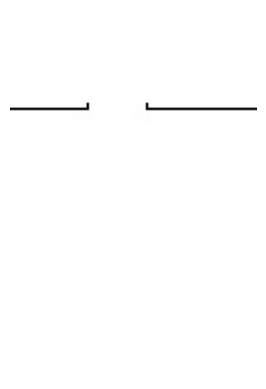

In [52]:
patch = imga[50:200, 150:250]
plt.imshow(patch, cmap='gray')
plt.axis('off')  
plt.show()



Zoomer en format 16:9

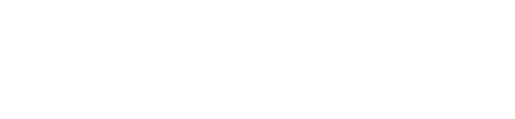

In [53]:
patch = imga[50:200, 150:250]
subset_patch = patch[50:70, :]
plt.imshow(subset_patch, cmap='gray')
plt.axis('off')  
plt.show()


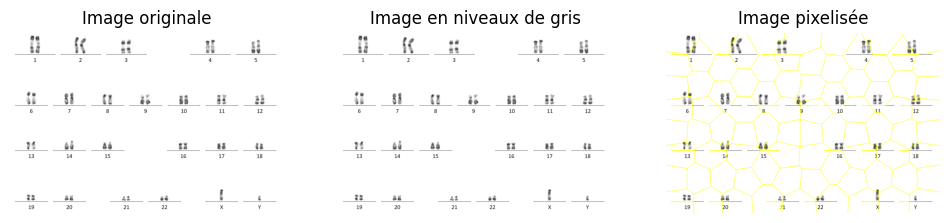

In [13]:
image = io.imread("KN2.jpg")
gray_image = color.rgb2gray(image)

segments = segmentation.slic(image, n_segments=100, compactness=10)
pixelized_image = segmentation.mark_boundaries(gray_image, segments)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.title("Image originale")
plt.imshow(image)
plt.axis('off')

plt.subplot(132)
plt.title("Image en niveaux de gris")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title("Image pixelisée")
plt.imshow(pixelized_image, cmap='gray')
plt.axis('off')

plt.show()

## Travail demandé (3)
Refaire les mêmes instructions en utilisnat la bibliothèque 'scikit-image'

Text(0.5, 1.0, 'Unwrapped minus original')

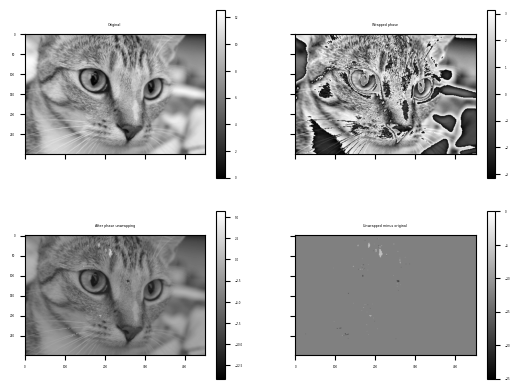

In [35]:

image = color.rgb2gray(img_as_float(data.chelsea()))

image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))

image_wrapped = np.angle(np.exp(1j * image))

image_unwrapped = unwrap_phase(image_wrapped)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(image, cmap='gray', vmin=0, vmax=4 * np.pi), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(image_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped, cmap='gray'), ax=ax3)
ax3.set_title('After phase unwrapping')

fig.colorbar(ax4.imshow(image_unwrapped - image, cmap='gray'), ax=ax4)
ax4.set_title('Unwrapped minus original')

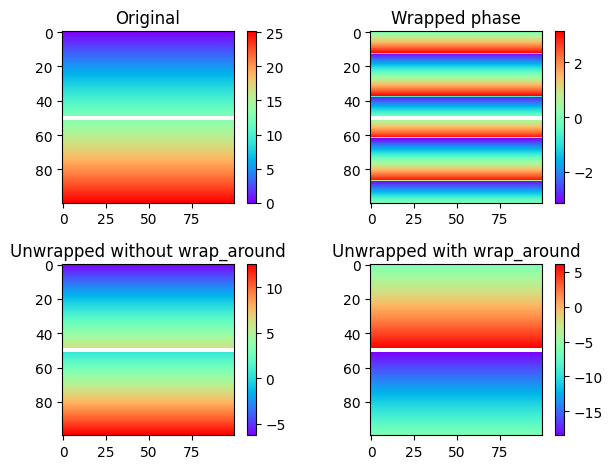

In [14]:
# Create a simple ramp
image = np.ones((100, 100)) * np.linspace(0, 8 * np.pi, 100).reshape((-1, 1))
# Mask the image to split it in two horizontally
mask = np.zeros_like(image, dtype=bool)
mask[image.shape[0] // 2, :] = True

image_wrapped = np.ma.array(np.angle(np.exp(1j * image)), mask=mask)
# Unwrap image without wrap around
image_unwrapped_no_wrap_around = unwrap_phase(image_wrapped,
                                              wrap_around=(False, False))
# Unwrap with wrap around enabled for the 0th dimension
image_unwrapped_wrap_around = unwrap_phase(image_wrapped,
                                           wrap_around=(True, False))

fig, ax = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(np.ma.array(image, mask=mask), cmap='rainbow'), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(image_wrapped, cmap='rainbow', vmin=-np.pi, vmax=np.pi),
             ax=ax2)
ax2.set_title('Wrapped phase')

fig.colorbar(ax3.imshow(image_unwrapped_no_wrap_around, cmap='rainbow'),
             ax=ax3)
ax3.set_title('Unwrapped without wrap_around')

fig.colorbar(ax4.imshow(image_unwrapped_wrap_around, cmap='rainbow'), ax=ax4)
ax4.set_title('Unwrapped with wrap_around')

plt.tight_layout()
plt.show()

In [34]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

matplotlib.rcParams['font.size'] = 2

images = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'eagle',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )



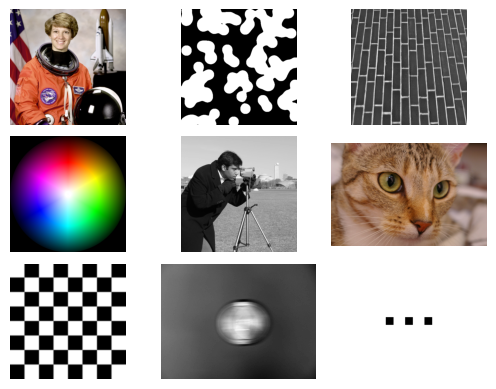

In [32]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for ax in axs.flat:
    ax.axis("off")
axs[0, 0].imshow(data.astronaut())
axs[0, 1].imshow(data.binary_blobs(), cmap=plt.cm.gray)
axs[0, 2].imshow(data.brick(), cmap=plt.cm.gray)
axs[1, 0].imshow(data.colorwheel())
axs[1, 1].imshow(data.camera(), cmap=plt.cm.gray)
axs[1, 2].imshow(data.cat())
axs[2, 0].imshow(data.checkerboard(), cmap=plt.cm.gray)
axs[2, 1].imshow(data.clock(), cmap=plt.cm.gray)
further_img = np.full((300, 300), 255)
for xpos in [100, 150, 200]:
    further_img[150 - 10 : 150 + 10, xpos - 10 : xpos + 10] = 0
axs[2, 2].imshow(further_img, cmap=plt.cm.gray)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

## Travail demandé (4)
Reprendre et décortiquer le travail de : https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

In [17]:
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

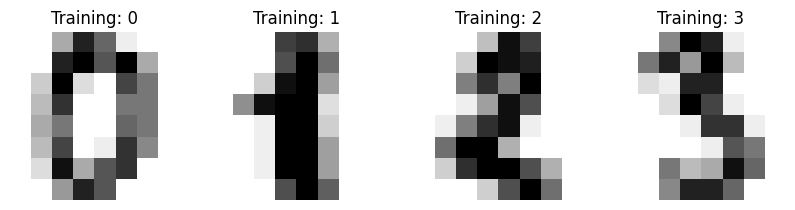

In [18]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [19]:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(predicted)

[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 2 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 9 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 3 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 3 1 4 0 5 3 

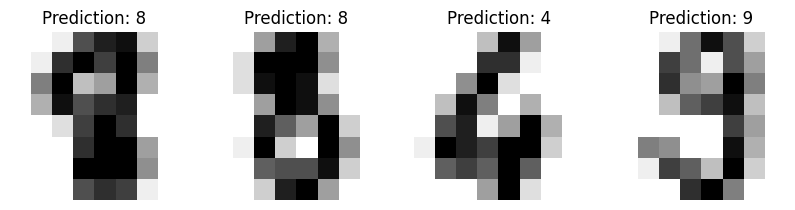

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [21]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


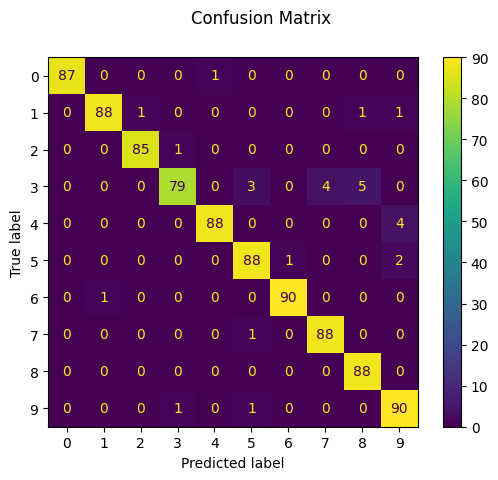

In [22]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [62]:
y_true = []
y_pred = []
cm = disp.confusion_matrix

for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


